In [1]:
#filtering data - straight driving downsampled to 10%
#WORKS!

In [2]:
import numpy as np
import pandas as pd
import cv2
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.layers.convolutional import Conv2D, Cropping2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
from tqdm import tqdm
import random

#print(K.image_data_format())
#'channels_first'
#K.set_image_data_format('channels_last')
#print(K.image_data_format())

images_list = []
split = 8000

data = pd.read_csv('mydata2/driving_log.csv')


Using TensorFlow backend.


all data (27241, 1)
all images (27241, 1)
[-404.7619]
[ 383.8028]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-404.         -396.05050505 -388.1010101  -380.15151515 -372.2020202
 -364.25252525 -356.3030303  -348.35353535 -340.4040404  -332.45454545
 -324.50505051 -316.55555556 -308.60606061 -300.65656566 -292.70707071
 -284.75757576 -276.80808081 -268.85858586 -260.90909091 -252.95959596
 -245.01010101 -237.06060606 -229.11111111 -221.16161616 -213.21212121
 -205.26262626 -197.31313131 -189.36363636 -181.41414141 -173.46464646
 -165.51515152 -157.56565657 -149.61616162 -141.66666667 -133.71717172
 -125.76767677 -117.81818182 -109.86868687 -101.91919192  -93.96969697
  -86.02020202  -78.07070707  -70.12121212  -62.17171717  -54.22222222
  -46.27272727  -38.32323232  -30.37373737  -22.42424242  -14.47474747
   -6.52525253    1.42424242    9.37373737   17.32323232   25.27272727
   33.22222222   41.17171717   49.12121212   57.07070707   65.02020202
   72.96969697   80.91919192   88.8

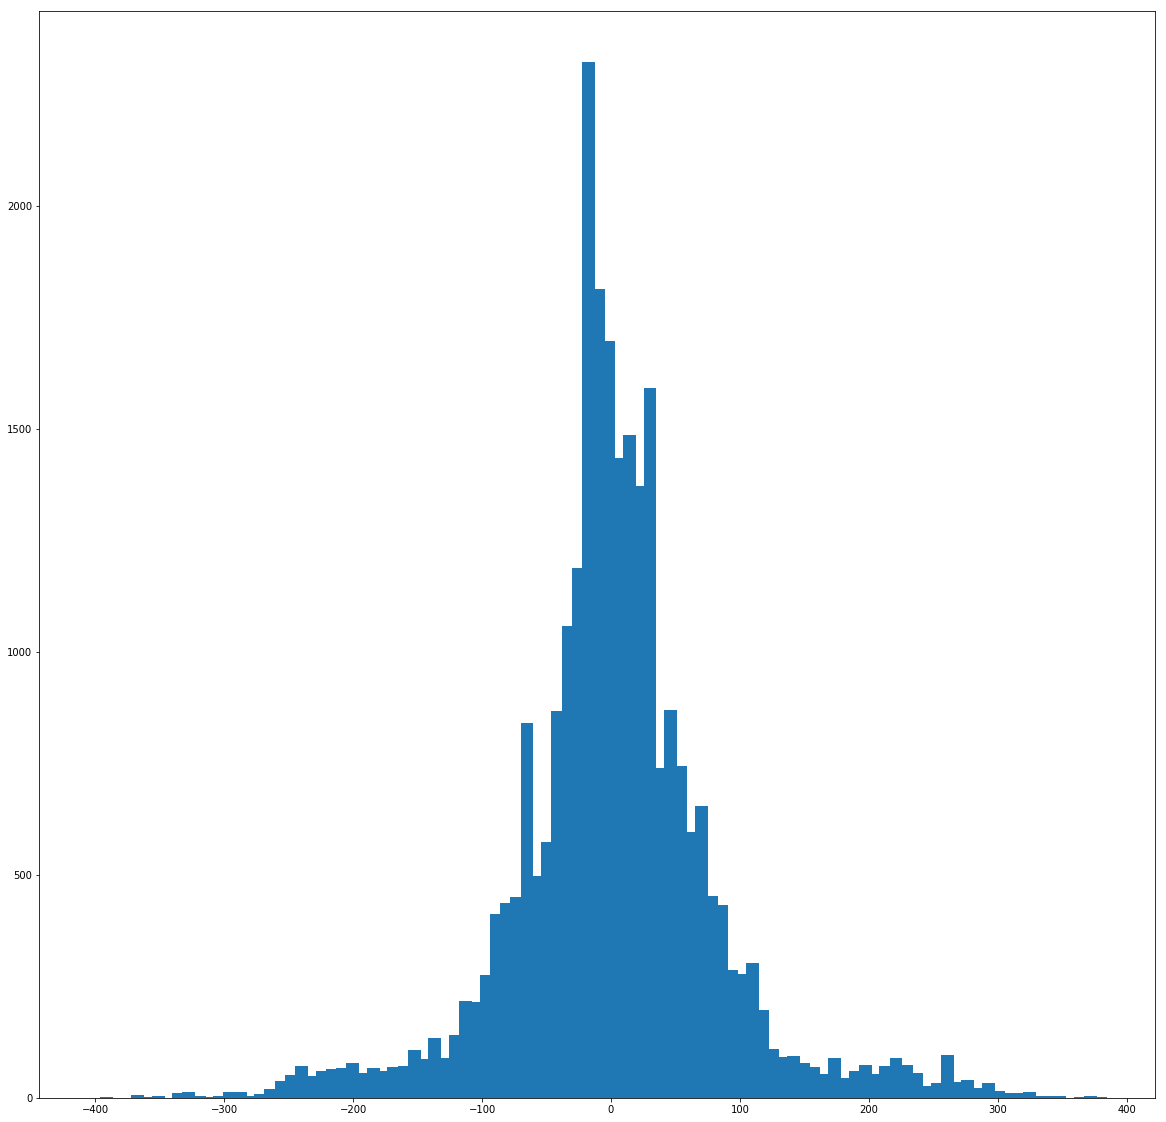

sharp_turn_images (2904,)
bsharp_turn_data (2904,)
straight_drv_images (24337,)
straight_drv_data (24337,)
straight_drv_images (2433,)
straight_drv_data (2433,)
All (8241,)
All (8241,)
turn mag type <class 'numpy.ndarray'>
turn mag full [-120.892    -252.9762    172.619    ...,    7.440476   -1.488095  107.1429  ]
-404.7619
383.8028
<class 'numpy.ndarray'>
<class 'numpy.float64'>
[-404.         -396.05050505 -388.1010101  -380.15151515 -372.2020202
 -364.25252525 -356.3030303  -348.35353535 -340.4040404  -332.45454545
 -324.50505051 -316.55555556 -308.60606061 -300.65656566 -292.70707071
 -284.75757576 -276.80808081 -268.85858586 -260.90909091 -252.95959596
 -245.01010101 -237.06060606 -229.11111111 -221.16161616 -213.21212121
 -205.26262626 -197.31313131 -189.36363636 -181.41414141 -173.46464646
 -165.51515152 -157.56565657 -149.61616162 -141.66666667 -133.71717172
 -125.76767677 -117.81818182 -109.86868687 -101.91919192  -93.96969697
  -86.02020202  -78.07070707  -70.12121212  -62.17

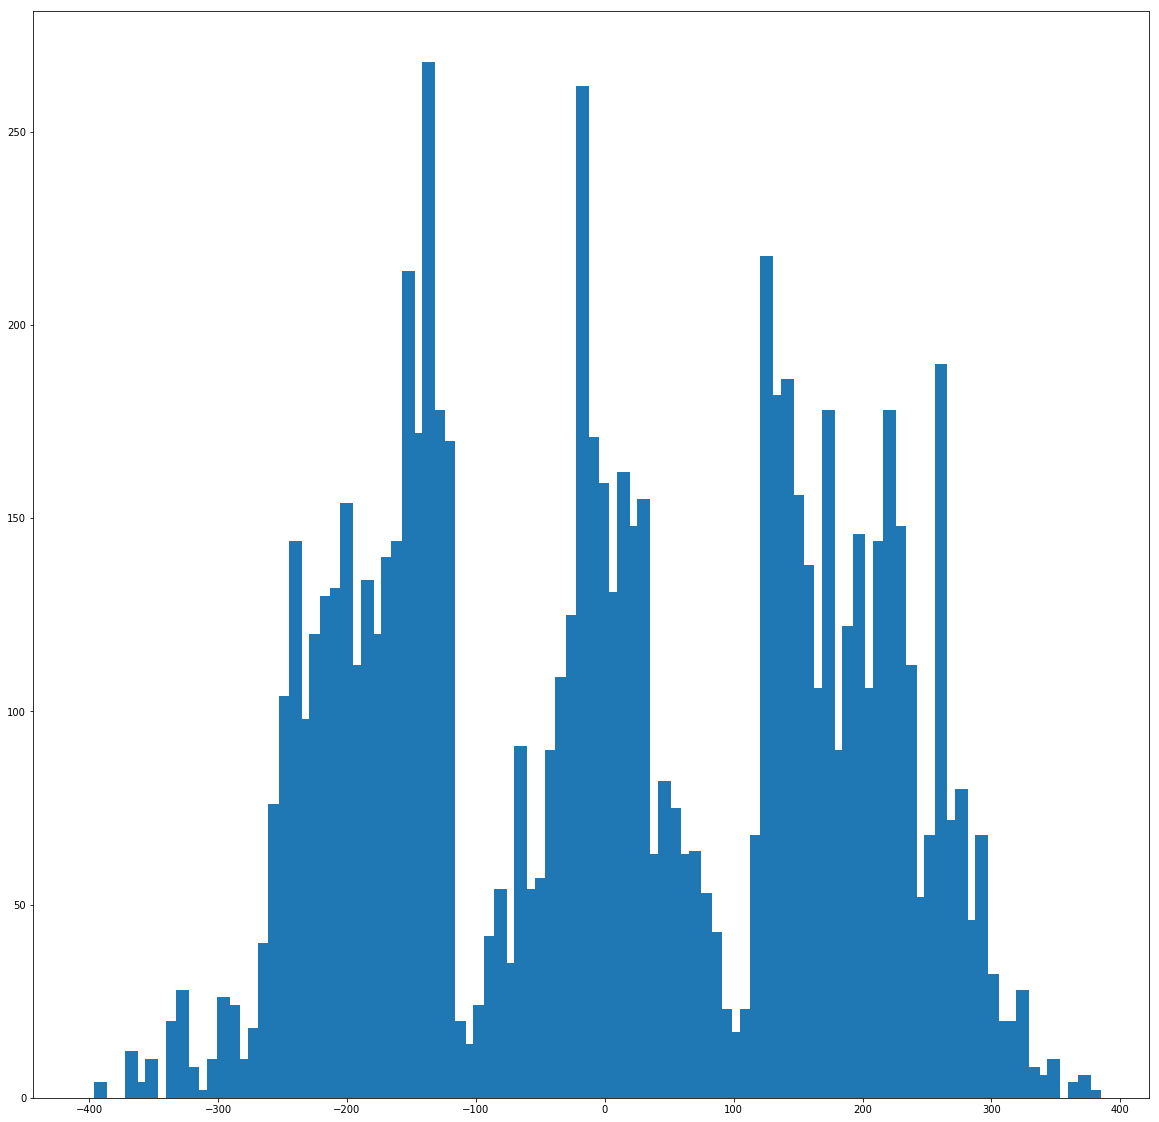

In [3]:



from sklearn.utils import shuffle
new_list = shuffle(data)
straight_threshold = 0.12

better_data_steering = new_list.iloc[:,[3]].as_matrix()
better_data_images = new_list.iloc[:,[0]].as_matrix()

print ("all data", better_data_steering.shape)
print ("all images", better_data_images.shape)


turn_list = better_data_steering * 1000

print (min(turn_list))
print (max(turn_list))
print (type(turn_list))
print (type(turn_list[0]))

#bins = np.linspace(-400, 400, 100) # fixed number of bins
bins = np.linspace(math.ceil(min(turn_list)), 
                   math.floor(max(turn_list)),
                   100) # fixed number of bins
print (bins)

plt.figure(figsize=(20,20))
plt.hist(turn_list, bins=bins, width=10)
plt.show()



sharp_turn_images = better_data_images[np.logical_or(better_data_steering >= straight_threshold , better_data_steering <= -straight_threshold) ]
sharp_turn_data   = better_data_steering[np.logical_or(better_data_steering >= straight_threshold , better_data_steering <= -straight_threshold) ]
print ("sharp_turn_images",sharp_turn_images.shape)
print ("bsharp_turn_data",sharp_turn_data.shape)

straight_drv_images = better_data_images[ np.logical_and(better_data_steering <= straight_threshold , better_data_steering >= -straight_threshold) ]
straight_drv_data = better_data_steering[ np.logical_and(better_data_steering <= straight_threshold , better_data_steering >= -straight_threshold) ]
print ("straight_drv_images",straight_drv_images.shape)
print ("straight_drv_data",straight_drv_data.shape)


straight_drv_images =straight_drv_images [:straight_drv_images.shape[0]//10]
straight_drv_data =straight_drv_data [:straight_drv_data.shape[0]//10]

print ("straight_drv_images",straight_drv_images.shape)
print ("straight_drv_data",straight_drv_data.shape)


all_images  = np.concatenate ((sharp_turn_images, sharp_turn_images, straight_drv_images), axis=0)
all_data  = np.concatenate ((sharp_turn_data, sharp_turn_data, straight_drv_data), axis=0)

print ("All",all_data.shape)
print ("All",all_images.shape)

turn_mag2 = all_data*1000
print ("turn mag type", type(turn_mag2))
print ("turn mag full", turn_mag2)

#turn_list = turn_mag.values.tolist()
turn_list2 = turn_mag2

print (min(turn_list2))
print (max(turn_list2))
print (type(turn_list2))
print (type(turn_list2[0]))

#bins = np.linspace(-400, 400, 100) # fixed number of bins
bins2 = np.linspace(math.ceil(min(turn_list2)), 
                   math.floor(max(turn_list2)),
                   100) # fixed number of bins
print (bins2)

plt.figure(figsize=(20,20))
plt.hist(turn_list2, bins=bins2, width=10)
plt.show()


In [4]:
c = list(zip(all_data, all_images))
random.shuffle(c)
all_data, all_images = zip(*c)


names = all_images

for name in tqdm(names):
    #print (name.split('\\'))
    if name.startswith('/'):
        #print (name.split('/'))
        path = 'mydata2/IMG/'+name.split('/')[9]
        #print ("media",path)
    else:
        #print (name.split('\\'))
        path = 'mydata2/IMG/'+name.split('\\')[6]
        #print (path)
    
    image = cv2.imread(path)
    image = image[...,::-1] #conversion to rgb
    #plt.imshow(image)
    #plt.show()
    #print(image)
    images_list.append(image)
    

print ("image list", np.array(images_list).shape)

X_train = np.array(images_list[:split])
y_train = all_data[:split]
y_train = np.expand_dims(y_train, axis=1)

X_valid = np.array(images_list[split:])
y_valid = all_data[split:]
y_valid = np.expand_dims(y_valid, axis=1)

print("x train shape",X_train.shape)
print("y train shape",y_train.shape)

print("x valid shape",X_valid.shape)
print("y valid shape", y_valid.shape)


def nvidia_model():
    model = Sequential()
    # input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
    # this applies 32 convolution filters of size 3x3 each.
    nv_model = Sequential()
    nv_model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    nv_model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))
    nv_model.add (Conv2D(24, (5,5), strides=2, padding="valid", activation = "relu"))
    nv_model.add (Conv2D(36, (5,5), strides=2, padding="valid", activation = "relu"))
    
    nv_model.add (Conv2D(48, (5,5), strides=2, padding="valid", activation = "relu"))
    nv_model.add (Conv2D(64, (3,3), strides=1, padding="valid", activation = "relu"))
    nv_model.add (Conv2D(64, (3,3), strides=1, padding="valid", activation = "relu"))
    
     
    nv_model.add(Flatten())
    nv_model.add(Dense(1164, activation="relu"))
    nv_model.add(Dense(100, activation="relu"))
    nv_model.add(Dense(50, activation="relu"))
    nv_model.add(Dense(10, activation="relu"))
    nv_model.add(Dense(1, activation="tanh"))
    nv_model.compile(optimizer="adam", metrics=['accuracy'], loss="mse")
    return nv_model

my_model = nvidia_model()


my_model.fit(X_train, y_train,  validation_data=(X_valid,y_valid), shuffle=True, batch_size=32, epochs=5, verbose=1)
my_model.save("model.h5")
#score = model.evaluate(x_test, y_test, batch_size=32)



100%|██████████| 8241/8241 [00:12<00:00, 678.00it/s]


image list (8241, 160, 320, 3)
x train shape (8000, 160, 320, 3)
y train shape (8000, 1)
x valid shape (241, 160, 320, 3)
y valid shape (241, 1)
Train on 8000 samples, validate on 241 samples
Epoch 1/5
8000/8000 [==============================] - 82s - loss: 0.0041 - acc: 0.0035 - val_loss: 0.0014 - val_acc: 0.0000e+00
Epoch 2/5
8000/8000 [==============================] - 9s - loss: 9.3262e-04 - acc: 0.0035 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 3/5
8000/8000 [==============================] - 9s - loss: 8.1529e-04 - acc: 0.0035 - val_loss: 9.3846e-04 - val_acc: 0.0000e+00
Epoch 4/5
8000/8000 [==============================] - 9s - loss: 6.8982e-04 - acc: 0.0035 - val_loss: 7.3953e-04 - val_acc: 0.0000e+00
Epoch 5/5
8000/8000 [==============================] - 9s - loss: 6.8407e-04 - acc: 0.0035 - val_loss: 9.7801e-04 - val_acc: 0.0000e+00
